In [2]:
import sys
sys.path.append('./../../')

import torch
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from user_fun.pde import diff
from user_fun.baseline.heat import HeatBenchMark_longtime

np.random.seed(1)
torch.manual_seed(1)


from user_fun.solver.cp_solver import CloudPointSolver
from user_fun.geom import line_linspace,generate_points_in_rectangle




In [3]:
cp_list,loss_list = HeatBenchMark_longtime()
field_input = cp_list[3][0]

solver = CloudPointSolver(
    cp_list,
    loss_list,
    model = [2, 50, 50, 50, 1],
    optimizer = "adam")


from user_fun.io import read_comsol
from user_fun.io.read_comsol import process_comsol_time_table
tb = read_comsol.comsol_read('time_heat.csv', skiprows=8)
tb = process_comsol_time_table(tb, space_dimension=1)

def eval(solver):
    x = tb['x'].to_numpy()
    t = tb['t'].to_numpy()
    u = tb['u (K)'].to_numpy()
    plot_input = np.vstack([x, t]).T
    
    pred_u = solver.model_eval(plot_input)
    return np.mean(np.abs(pred_u[:,0] - u))

epoch_num = 3000
error_list = []
for i in range(epoch_num):
    solver.train_step()
    if i%30 == 0:
        print(f'-------------{i}----------')
        solver.test_step(print_flag=True)
        relative_error = eval(solver)
        error_list.append(relative_error)
        print(f'relative error is {relative_error}')



y_cpu = solver.model_eval(field_input)


-------------0----------
loss is [3.6908179e-05 5.3971338e-01 5.7081443e-01 4.8268157e-01 1.5932462e+00]
relative error is 0.3508474471851792
-------------30----------
loss is [0.00236015 0.47097954 0.49040493 0.38173628 1.3454809 ]
relative error is 0.3154625450803095
-------------60----------
loss is [0.00684897 0.42700166 0.49973163 0.3551132  1.2886955 ]
relative error is 0.3011489370820532
-------------90----------
loss is [0.04282387 0.36203918 0.48725447 0.31257257 1.2046901 ]
relative error is 0.3110251449722962
-------------120----------
loss is [0.10339543 0.29749018 0.43787384 0.28142244 1.1201818 ]
relative error is 0.3146821871630656
-------------150----------
loss is [0.14471301 0.26004225 0.39504975 0.2570439  1.056849  ]
relative error is 0.31211752275337307
-------------180----------
loss is [0.16061269 0.23272544 0.36094856 0.21680447 0.97109115]
relative error is 0.31468122036948265
-------------210----------
loss is [0.20701532 0.20833628 0.28228143 0.17337635 0.871

0.03362789830068802


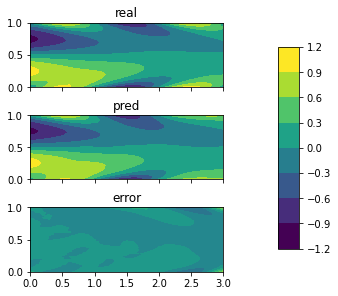

In [4]:
# input
from user_fun.io import read_comsol
from user_fun.io.read_comsol import process_comsol_time_table
tb = read_comsol.comsol_read('time_heat.csv', skiprows=8)
tb = process_comsol_time_table(tb, space_dimension=1)
x = tb['x'].to_numpy()
t = tb['t'].to_numpy()
plot_input_para = np.vstack([x, t]).T
plot_output_para = solver.model_eval(plot_input_para )

def plot_result(plot_input, plot_output):
    from user_fun.io import read_comsol
    from user_fun.io.read_comsol import process_comsol_time_table
    tb = read_comsol.comsol_read('time_heat.csv', skiprows=8)
    tb = process_comsol_time_table(tb, space_dimension=1)
    x = tb['x'].to_numpy()
    t = tb['t'].to_numpy()
    u = tb['u (K)'].to_numpy()

    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.tri as tri

    # Create color normalization
    vmin = np.min(u)
    vmax = np.max(u)
    from matplotlib.colors import Normalize
    norm = Normalize(vmin=vmin, vmax=vmax)

    # Create plots with vertical arrangement
    fig, axs = plt.subplots(3, 1, sharex=True, sharey=True,constrained_layout=True)

    # Set axis limits
    for ax in axs:
        ax.set_xlim(0, 3)
        ax.set_ylim(0, 1)
        ax.set_aspect('equal')

    # Create triangulation object
    triang = tri.Triangulation(plot_input[:,1], plot_input[:,0])

    # Plot tricontour 1
    cn1 = axs[0].tricontourf(triang, u, cmap='viridis', norm=norm)
    axs[0].set_title('real')

    # Plot tricontour 2
    cn2 = axs[1].tricontourf(triang, plot_output[:, 0], cmap='viridis', norm=norm)
    axs[1].set_title('pred')

    # Plot tricontour 3
    cn3 = axs[2].tricontourf(triang, plot_output[:, 0] - u, cmap='viridis', norm=norm)
    axs[2].set_title('error')
    print(np.mean(np.abs(plot_output[:, 0] - u)))


    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    cbar = fig.colorbar(cn1, cax=cbar_ax, orientation='vertical')

plot_result(plot_input_para, plot_output_para)
